# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [45]:
# import some data to play with
data = pd.read_csv('C:/Users/RajabhishekAditya/Downloads/decison tree/Company_Data.csv')

In [46]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [47]:
data['Sales'].astype(np.int64)

0       9
1      11
2      10
3       7
4       4
       ..
395    12
396     6
397     7
398     5
399     9
Name: Sales, Length: 400, dtype: int64

In [48]:
#Data Structure 
type(data)
data.shape

(400, 11)

In [49]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [50]:
#Creating dummy variable for Weather column
comp=pd.get_dummies(data,columns=['ShelveLoc','Urban','US'])

In [51]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [52]:
x=comp.iloc[:,1:15]
y=comp['Sales']

In [53]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [54]:
comp = pd.cut(comp.Sales,bins=[-1,3,7,12,18],labels=['1','2','3','4'])
y=comp

In [55]:
y

0      3
1      3
2      3
3      3
4      2
      ..
395    4
396    2
397    3
398    2
399    3
Name: Sales, Length: 400, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [56]:
comp.unique()

['3', '2', '4', '1']
Categories (4, object): ['1' < '2' < '3' < '4']

In [57]:
comp.value_counts()

3    189
2    167
4     27
1     17
Name: Sales, dtype: int64

In [79]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [80]:
print(x_train.shape, x_test.shape)

(320, 14) (80, 14)


In [81]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

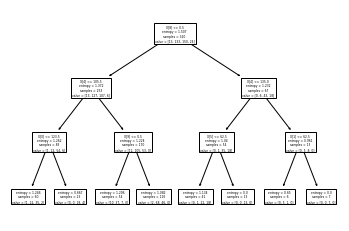

In [82]:
#PLot the decision tree
tree.plot_tree(model);


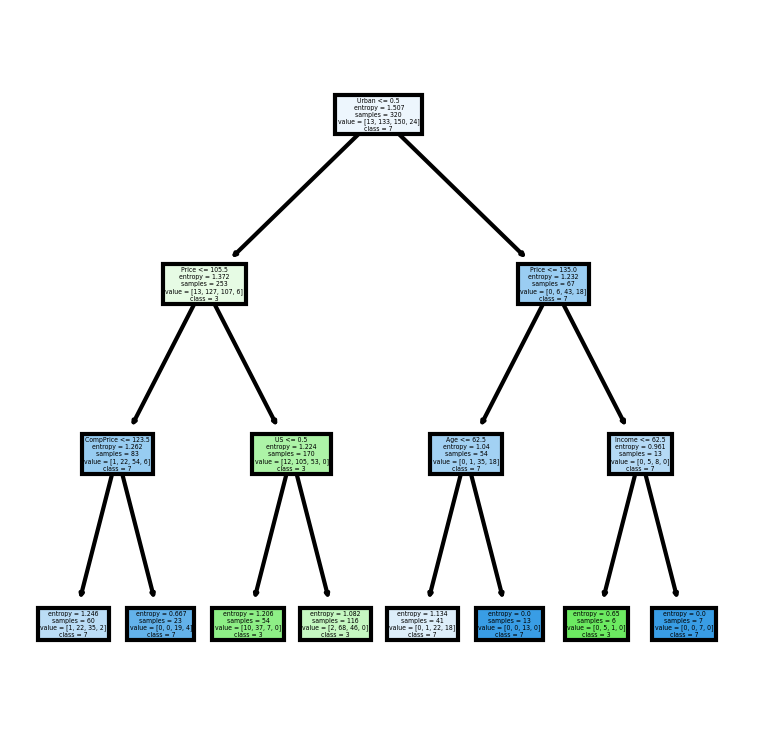

In [83]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc','Urban','US']
cn=['-1', '3', '7','12','18']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [84]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

3    42
2    38
dtype: int64

In [85]:
preds

array(['3', '2', '2', '3', '3', '2', '3', '3', '2', '3', '3', '2', '2',
       '3', '3', '3', '2', '3', '2', '2', '3', '3', '2', '3', '2', '2',
       '3', '2', '3', '3', '3', '3', '3', '2', '3', '3', '2', '2', '2',
       '2', '2', '2', '2', '3', '3', '3', '3', '2', '2', '2', '2', '2',
       '3', '3', '2', '3', '3', '3', '3', '2', '2', '2', '3', '2', '2',
       '3', '3', '2', '2', '3', '3', '3', '3', '2', '3', '3', '2', '2',
       '2', '3'], dtype=object)

In [86]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,2,3
Sales,,
1,4,0
2,23,11
3,11,28
4,0,3


In [87]:
# Accuracy 
np.mean(preds==y_test)

0.6375

# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [308]:
# import some data to play with
tax = pd.read_csv('C:/Users/RajabhishekAditya/Downloads/decison tree/Fraud_check.csv')

In [309]:
tax

,Undergrad,Marital.Status,Taxable,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [310]:
#Data Structure 
type(tax)
tax.shape

(600, 6)

In [311]:
tax.dtypes

Undergrad          object
Marital.Status     object
Taxable             int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [312]:
#Creating dummy variable for Weather column
tax1=pd.get_dummies(tax,columns=['Undergrad','Marital.Status','Urban'])

In [313]:
tax1

,Taxable,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [314]:
tax1.dtypes

Taxable                    int64
City.Population            int64
Work.Experience            int64
Undergrad_NO               uint8
Undergrad_YES              uint8
Marital.Status_Divorced    uint8
Marital.Status_Married     uint8
Marital.Status_Single      uint8
Urban_NO                   uint8
Urban_YES                  uint8
dtype: object

In [315]:
#Complete Iris dataset
#label_encoder = preprocessing.LabelEncoder()
#tax1['Taxable.Income']= label_encoder.fit_transform(tax1['Taxable.Income']) 

In [316]:
x=tax1.iloc[:,1:10]
y=tax1['Taxable']

In [317]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [318]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable, Length: 600, dtype: int64

In [329]:
y = pd.cut(tax1.Taxable,bins=[1,15000,30000,50000,100000],labels=['1','2','3','4'])

In [330]:
y

0      4
1      3
2      3
3      4
4      4
      ..
595    4
596    4
597    3
598    4
599    4
Name: Taxable, Length: 600, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [331]:
y.value_counts()

4    330
3    146
2     90
1     34
Name: Taxable, dtype: int64

In [332]:
y.unique()

['4', '3', '2', '1']
Categories (4, object): ['1' < '2' < '3' < '4']

In [333]:
colnames = list(tax1.columns)
colnames

['Taxable',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [334]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [335]:
print(x_train.shape, x_test.shape)

(480, 9) (120, 9)


In [336]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

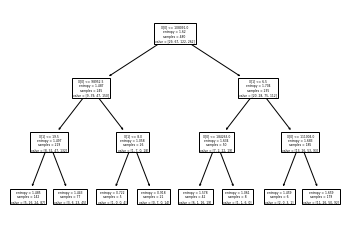

In [337]:
#PLot the decision tree
tree.plot_tree(model);

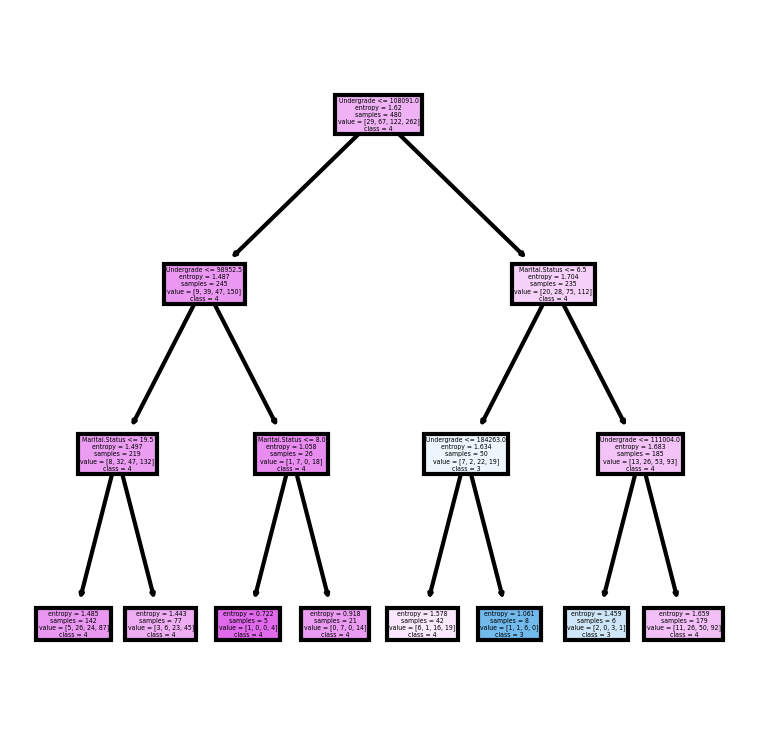

In [338]:
fn=['Undergrade','Marital.Status','Urban','City.Population','Work.Experience']
cn=['1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [339]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

4    119
3      1
dtype: int64

In [340]:
preds

array(['4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '3', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4'], dtype=object)

In [341]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,3,4
Taxable,,
1,1,4
2,0,23
3,0,24
4,0,68


In [342]:
# Accuracy 
np.mean(preds==y_test)

0.5666666666666667

In [343]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [344]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [345]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5666666666666667